In [1]:
from metaflow import Flow, get_metadata, namespace
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/chip/dev/outerbounds/metaflow-hf


In [2]:
# Set namespace to None to search over all namespaces
namespace(None)
run = Flow("SentimentAnalysisFlow").latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('SentimentAnalysisFlow/1636596844932211')


In [3]:
run.data

<MetaflowData: test_dataset, eval_df, model, train_df, eval_dataset, name, tokenizer, fname, mode, train_dataset, test_df>

<div>
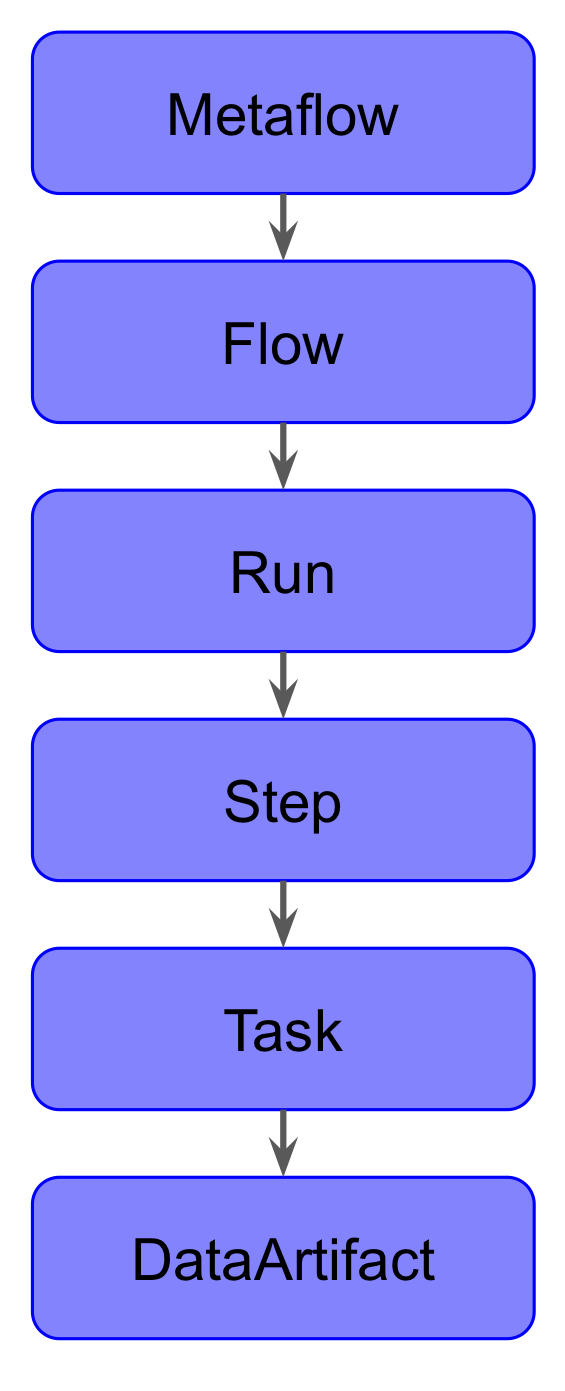
</div>

In [4]:
model = run.data.model
tokenizer = run.data.tokenizer

In [5]:
import torch

In [6]:
def predict(model, tokenizer, review):
    model.eval()
    encoding = run.data.tokenizer(review, padding=True, truncation=True, return_tensors="pt")
    output = model(**encoding)
    probs = torch.nn.functional.softmax(output["logits"])
    pred = torch.argmax(probs).numpy()
    sentiment = "POSITIVE" if pred == 1 else "NEGATIVE"
    return sentiment

In [7]:
predict(model, tokenizer, "This movie is awesome!")

/var/folders/d0/wr9p61px1kn5cxc4bttc6r7w0000gn/T/ipykernel_19379/3190754762.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(output["logits"])


'NEGATIVE'

In [8]:
runs = list(run)

In [9]:
runs

[Step('SentimentAnalysisFlow/1636596844932211/end'),
 Step('SentimentAnalysisFlow/1636596844932211/train'),
 Step('SentimentAnalysisFlow/1636596844932211/tokenize'),
 Step('SentimentAnalysisFlow/1636596844932211/start')]